In [17]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from tqdm import tqdm

In [14]:
mnist = fetch_openml('mnist_784', as_frame=False, cache=True)
print(mnist.data.shape)
mnist.data

(70000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X /= 255.0
X.min(), X.max()

(0.0, 1.0)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52500, 784), (17500, 784), (52500,), (17500,))

# sample

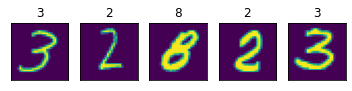

In [10]:
for i, (img, y_train) in enumerate(zip(X_train[:5].reshape(5, 28, 28), y_train[:5])):
    plt.subplot(151 + i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train)

# test

In [22]:
svc = make_pipeline(StandardScaler(), SVC())
svc.fit(X_train,y_train)
result=svc.predict(X_test)
print('Accuracy :',accuracy_score(y_test,result))
print(classification_report(y_test,result))

Accuracy : 0.9633714285714285
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1714
           1       0.98      0.99      0.98      1977
           2       0.95      0.96      0.95      1761
           3       0.96      0.95      0.96      1806
           4       0.96      0.97      0.96      1587
           5       0.97      0.96      0.97      1607
           6       0.97      0.98      0.98      1761
           7       0.93      0.97      0.95      1878
           8       0.97      0.95      0.96      1657
           9       0.96      0.94      0.95      1752

    accuracy                           0.96     17500
   macro avg       0.96      0.96      0.96     17500
weighted avg       0.96      0.96      0.96     17500



# find best hyperparameter

In [23]:
kernels = {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
for kernel in tqdm(kernels):
    granularity = 0.1
    accuracy_list=[]
    c_list=[0.1*i for i in range(1,10)]
    for c in tqdm(c_list):
        svc = SVC(C=c, kernel=kernel)
        svc.fit(X_train, y_train)
        result = svc.predict(X_test)
        accuracy_list.append(accuracy_score(y_test, result))
    plt.plot(c_list,accuracy_list,label=kernel)
    plt.legend()
plt.show()